# EDA for casp13 Dataset
Goal: Perform exploratory data analysis (EDA) on the casp13 dataset to understand the dataset format and the frequency of secondary structure elements in the dataset.

In [1]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
file_dir = '../Data/Original/casp13_dataset.csv'
df_ori = pd.read_csv(file_dir, sep=',', header=0)
df_ori

,pdb,aa,chain,q3,q8,asa,rsa,phi,psi
0,6RBK,S,A,C,C,79.0,0.509677,360.0,170.7
1,6RBK,L,A,C,C,162.0,0.805970,72.2,-14.0
2,6RBK,L,A,C,S,159.0,0.791045,125.2,-56.7
3,6RBK,E,A,C,C,136.0,0.609865,166.9,173.3
4,6RBK,R,A,C,C,217.0,0.791971,123.0,98.9
...,...,...,...,...,...,...,...,...,...
56560,6D7Y,L,B,B,E,108.0,0.537313,104.4,160.0
56561,6D7Y,G,B,C,C,7.0,0.067308,80.9,170.5
56562,6D7Y,P,B,C,S,83.0,0.522013,-69.9,-19.2
56563,6D7Y,L,B,C,C,10.0,0.049751,-84.1,135.2


In [3]:
# Group the data by PDB code
grouped = df_ori.groupby('pdb')

processed_data = []

for _, group in grouped:
    # Combine the amino acid and secondary structure sequences
    combined_aa = ''.join(group['aa'].tolist())
    combined_q8 = ''.join(group['q8'].tolist())
    combined_q3 = ''.join(group['q3'].tolist())
    protein_length = len(combined_aa)

    # Append the processed data to the list
    processed_data.append({
        'seq': combined_aa,
        'dssp8': combined_q8,
        'dssp3': combined_q3
    })

df = pd.DataFrame(processed_data)

In [4]:
df

,seq,dssp8,dssp3
0,VELPPEEaDLFTGEWVFDNETHPLYKEDQbEFLTAQVTcMRNGRRD...,CCCCCTTCCTTSEEEEECTTTCSSSCGGGCTTCCTTTCTTTTTCCC...,CCCCCCCCCCCCBBBBBCCCCCCCCCHHHCCCCCCCCCCCCCCCCC...
1,ALAATDIPGLDASKLVSGVLAEQRLPVFARGLATAVSNSSDPNTAT...,CCCGGGSCCEEGGGEEESCCCGGGSCGGGGTBCCSSCTTCCGGGCC...,CCCHHHCCCBBHHHBBBCCCCHHHCCHHHHCBCCCCCCCCCHHHCC...
2,ALAATDIPGLDASKLVSGVLAEQRLPVFARGLATAVSNSSDPNTAT...,CCCGGGSCCEEGGGEEESCCCGGGSCGGGGTBCCSSCTTCCGGGCC...,CCCHHHCCCBBHHHBBBCCCCHHHCCHHHHCBCCCCCCCCCHHHCC...
3,NSFEVSSLPDANGKNHITAVKGDAKIPVDKIELYXRGKASGDLDSL...,CCCEEEEEECTTSCEEEEEEETTEEEETHHIIIIISSCCSSCHHHH...,CCCBBBBBBCCCCCBBBBBBBCCBBBBCHHHHHHHCCCCCCCHHHH...
4,TAQTIANSVVDAKKFDYLFGKATGNSHTLDRTNQLALEXKRLGVAD...,CHHHHHTSSSCHHHHHHHTTCCCCBTTBCCCHHHHHHHHHHHTCCS...,CHHHHHCCCCCHHHHHHHCCCCCCBCCBCCCHHHHHHHHHHHCCCC...
5,LDTAQAPYKGSTVIGHALSKHAGRHPEIWGKVKGSXSGWNEQAXKH...,CTTTTCEETTEEHHHHHHHHHHHHCHHHHCCCCSCHHHHHHHHHHH...,CCCCCCBBCCBBHHHHHHHHHHHHCHHHHCCCCCCHHHHHHHHHHH...
6,VVYPEINVKTLSQAVKNIWRLSHQQKSGIEIIQEKTLRISLYSRDL...,CCCCCCCHHHHHHHHHHHHHHHHHCCCSCSHHHHHHHHHHHHHHHH...,CCCCCCCHHHHHHHHHHHHHHHHHCCCCCCHHHHHHHHHHHHHHHH...
7,AVQGPWVGSSYVAETGQNWASLAANELRVTERPFWISSFIGRSKEE...,CCCSSCHHHHHHHHHSCSBHHHHHHHTTCCCSSEEGGGGTTCCCCE...,CCCCCCHHHHHHHHHCCCBHHHHHHHCCCCCCCBBHHHHCCCCCCB...
8,SLKPFTYPFPETRFLHAGPNVYKFKIRYG!NKEVITQELEDSVRVV...,CCCCCCSSSCEEEEEEETTEEEEEEEEECCCHHHHHHHHHHHHHHH...,CCCCCCCCCCBBBBBBBCCBBBBBBBBBCCCHHHHHHHHHHHHHHH...
9,MERFLRKYNISGDYANATRTFLAISPQWTCSHLKRNCLFNGMCAKQ...,CHHHHHHHTCCHHHHHHHHHHHHHTTTCCCCCSSGGGBCSSSBTTT...,CHHHHHHHCCCHHHHHHHHHHHHHCCCCCCCCCCHHHBCCCCBCCC...


In [5]:
# From the first column
# Check the percentage of unknown sequences (X or !) for each protein
def check_unknowns(df):
    """
    Check the percentage of unknown sequences (X or !) for each protein
    """
    # Get the sequence
    seq = df.iloc[:, 0]
    # Get the number of unknowns
    unknowns = seq.str.count('X') + seq.str.count('!')
    # Calculate the percentage of unknowns
    unknowns = unknowns / seq.str.len() * 100
    return unknowns

# Add the unknowns to the dataframe
df['unknown(%)'] = check_unknowns(df)
df

,seq,dssp8,dssp3,unknown(%)
0,VELPPEEaDLFTGEWVFDNETHPLYKEDQbEFLTAQVTcMRNGRRD...,CCCCCTTCCTTSEEEEECTTTCSSSCGGGCTTCCTTTCTTTTTCCC...,CCCCCCCCCCCCBBBBBCCCCCCCCCHHHCCCCCCCCCCCCCCCCC...,0.000000
1,ALAATDIPGLDASKLVSGVLAEQRLPVFARGLATAVSNSSDPNTAT...,CCCGGGSCCEEGGGEEESCCCGGGSCGGGGTBCCSSCTTCCGGGCC...,CCCHHHCCCBBHHHBBBCCCCHHHCCHHHHCBCCCCCCCCCHHHCC...,0.222321
2,ALAATDIPGLDASKLVSGVLAEQRLPVFARGLATAVSNSSDPNTAT...,CCCGGGSCCEEGGGEEESCCCGGGSCGGGGTBCCSSCTTCCGGGCC...,CCCHHHCCCBBHHHBBBCCCCHHHCCHHHHCBCCCCCCCCCHHHCC...,0.228415
3,NSFEVSSLPDANGKNHITAVKGDAKIPVDKIELYXRGKASGDLDSL...,CCCEEEEEECTTSCEEEEEEETTEEEETHHIIIIISSCCSSCHHHH...,CCCBBBBBBCCCCCBBBBBBBCCBBBBCHHHHHHHCCCCCCCHHHH...,2.336449
4,TAQTIANSVVDAKKFDYLFGKATGNSHTLDRTNQLALEXKRLGVAD...,CHHHHHTSSSCHHHHHHHTTCCCCBTTBCCCHHHHHHHHHHHTCCS...,CHHHHHCCCCCHHHHHHHCCCCCCBCCBCCCHHHHHHHHHHHCCCC...,2.040816
5,LDTAQAPYKGSTVIGHALSKHAGRHPEIWGKVKGSXSGWNEQAXKH...,CTTTTCEETTEEHHHHHHHHHHHHCHHHHCCCCSCHHHHHHHHHHH...,CCCCCCBBCCBBHHHHHHHHHHHHCHHHHCCCCCCHHHHHHHHHHH...,3.629032
6,VVYPEINVKTLSQAVKNIWRLSHQQKSGIEIIQEKTLRISLYSRDL...,CCCCCCCHHHHHHHHHHHHHHHHHCCCSCSHHHHHHHHHHHHHHHH...,CCCCCCCHHHHHHHHHHHHHHHHHCCCCCCHHHHHHHHHHHHHHHH...,0.528701
7,AVQGPWVGSSYVAETGQNWASLAANELRVTERPFWISSFIGRSKEE...,CCCSSCHHHHHHHHHSCSBHHHHHHHTTCCCSSEEGGGGTTCCCCE...,CCCCCCHHHHHHHHHCCCBHHHHHHHCCCCCCCBBHHHHCCCCCCB...,0.652174
8,SLKPFTYPFPETRFLHAGPNVYKFKIRYG!NKEVITQELEDSVRVV...,CCCCCCSSSCEEEEEEETTEEEEEEEEECCCHHHHHHHHHHHHHHH...,CCCCCCCCCCBBBBBBBCCBBBBBBBBBCCCHHHHHHHHHHHHHHH...,3.370787
9,MERFLRKYNISGDYANATRTFLAISPQWTCSHLKRNCLFNGMCAKQ...,CHHHHHHHTCCHHHHHHHHHHHHHTTTCCCCCSSGGGBCSSSBTTT...,CHHHHHHHCCCHHHHHHHHHHHHHCCCCCCCCCCHHHBCCCCBCCC...,0.000000


In [6]:
# Replace the unknown structure with A sequence
def replace_unknowns(df):
    """
    Replace the unknown structure with A sequence
    """
    # Get the sequence
    seq = df.iloc[:, 0]
    # Replace the unknowns with A
    seq = seq.str.replace('X', 'A')
    seq = seq.str.replace('!', 'A')
    return seq
# Add the unknowns to the dataframe
df['seq'] = replace_unknowns(df)
df

,seq,dssp8,dssp3,unknown(%)
0,VELPPEEaDLFTGEWVFDNETHPLYKEDQbEFLTAQVTcMRNGRRD...,CCCCCTTCCTTSEEEEECTTTCSSSCGGGCTTCCTTTCTTTTTCCC...,CCCCCCCCCCCCBBBBBCCCCCCCCCHHHCCCCCCCCCCCCCCCCC...,0.000000
1,ALAATDIPGLDASKLVSGVLAEQRLPVFARGLATAVSNSSDPNTAT...,CCCGGGSCCEEGGGEEESCCCGGGSCGGGGTBCCSSCTTCCGGGCC...,CCCHHHCCCBBHHHBBBCCCCHHHCCHHHHCBCCCCCCCCCHHHCC...,0.222321
2,ALAATDIPGLDASKLVSGVLAEQRLPVFARGLATAVSNSSDPNTAT...,CCCGGGSCCEEGGGEEESCCCGGGSCGGGGTBCCSSCTTCCGGGCC...,CCCHHHCCCBBHHHBBBCCCCHHHCCHHHHCBCCCCCCCCCHHHCC...,0.228415
3,NSFEVSSLPDANGKNHITAVKGDAKIPVDKIELYARGKASGDLDSL...,CCCEEEEEECTTSCEEEEEEETTEEEETHHIIIIISSCCSSCHHHH...,CCCBBBBBBCCCCCBBBBBBBCCBBBBCHHHHHHHCCCCCCCHHHH...,2.336449
4,TAQTIANSVVDAKKFDYLFGKATGNSHTLDRTNQLALEAKRLGVAD...,CHHHHHTSSSCHHHHHHHTTCCCCBTTBCCCHHHHHHHHHHHTCCS...,CHHHHHCCCCCHHHHHHHCCCCCCBCCBCCCHHHHHHHHHHHCCCC...,2.040816
5,LDTAQAPYKGSTVIGHALSKHAGRHPEIWGKVKGSASGWNEQAAKH...,CTTTTCEETTEEHHHHHHHHHHHHCHHHHCCCCSCHHHHHHHHHHH...,CCCCCCBBCCBBHHHHHHHHHHHHCHHHHCCCCCCHHHHHHHHHHH...,3.629032
6,VVYPEINVKTLSQAVKNIWRLSHQQKSGIEIIQEKTLRISLYSRDL...,CCCCCCCHHHHHHHHHHHHHHHHHCCCSCSHHHHHHHHHHHHHHHH...,CCCCCCCHHHHHHHHHHHHHHHHHCCCCCCHHHHHHHHHHHHHHHH...,0.528701
7,AVQGPWVGSSYVAETGQNWASLAANELRVTERPFWISSFIGRSKEE...,CCCSSCHHHHHHHHHSCSBHHHHHHHTTCCCSSEEGGGGTTCCCCE...,CCCCCCHHHHHHHHHCCCBHHHHHHHCCCCCCCBBHHHHCCCCCCB...,0.652174
8,SLKPFTYPFPETRFLHAGPNVYKFKIRYGANKEVITQELEDSVRVV...,CCCCCCSSSCEEEEEEETTEEEEEEEEECCCHHHHHHHHHHHHHHH...,CCCCCCCCCCBBBBBBBCCBBBBBBBBBCCCHHHHHHHHHHHHHHH...,3.370787
9,MERFLRKYNISGDYANATRTFLAISPQWTCSHLKRNCLFNGMCAKQ...,CHHHHHHHTCCHHHHHHHHHHHHHTTTCCCCCSSGGGBCSSSBTTT...,CHHHHHHHCCCHHHHHHHHHHHHHCCCCCCCCCCHHHBCCCCBCCC...,0.000000


In [7]:
# Check again the percentage of unknown sequences (X or !) for each protein
df.loc[:, 'unknown(%)'] = check_unknowns(df)
df

,seq,dssp8,dssp3,unknown(%)
0,VELPPEEaDLFTGEWVFDNETHPLYKEDQbEFLTAQVTcMRNGRRD...,CCCCCTTCCTTSEEEEECTTTCSSSCGGGCTTCCTTTCTTTTTCCC...,CCCCCCCCCCCCBBBBBCCCCCCCCCHHHCCCCCCCCCCCCCCCCC...,0.0
1,ALAATDIPGLDASKLVSGVLAEQRLPVFARGLATAVSNSSDPNTAT...,CCCGGGSCCEEGGGEEESCCCGGGSCGGGGTBCCSSCTTCCGGGCC...,CCCHHHCCCBBHHHBBBCCCCHHHCCHHHHCBCCCCCCCCCHHHCC...,0.0
2,ALAATDIPGLDASKLVSGVLAEQRLPVFARGLATAVSNSSDPNTAT...,CCCGGGSCCEEGGGEEESCCCGGGSCGGGGTBCCSSCTTCCGGGCC...,CCCHHHCCCBBHHHBBBCCCCHHHCCHHHHCBCCCCCCCCCHHHCC...,0.0
3,NSFEVSSLPDANGKNHITAVKGDAKIPVDKIELYARGKASGDLDSL...,CCCEEEEEECTTSCEEEEEEETTEEEETHHIIIIISSCCSSCHHHH...,CCCBBBBBBCCCCCBBBBBBBCCBBBBCHHHHHHHCCCCCCCHHHH...,0.0
4,TAQTIANSVVDAKKFDYLFGKATGNSHTLDRTNQLALEAKRLGVAD...,CHHHHHTSSSCHHHHHHHTTCCCCBTTBCCCHHHHHHHHHHHTCCS...,CHHHHHCCCCCHHHHHHHCCCCCCBCCBCCCHHHHHHHHHHHCCCC...,0.0
5,LDTAQAPYKGSTVIGHALSKHAGRHPEIWGKVKGSASGWNEQAAKH...,CTTTTCEETTEEHHHHHHHHHHHHCHHHHCCCCSCHHHHHHHHHHH...,CCCCCCBBCCBBHHHHHHHHHHHHCHHHHCCCCCCHHHHHHHHHHH...,0.0
6,VVYPEINVKTLSQAVKNIWRLSHQQKSGIEIIQEKTLRISLYSRDL...,CCCCCCCHHHHHHHHHHHHHHHHHCCCSCSHHHHHHHHHHHHHHHH...,CCCCCCCHHHHHHHHHHHHHHHHHCCCCCCHHHHHHHHHHHHHHHH...,0.0
7,AVQGPWVGSSYVAETGQNWASLAANELRVTERPFWISSFIGRSKEE...,CCCSSCHHHHHHHHHSCSBHHHHHHHTTCCCSSEEGGGGTTCCCCE...,CCCCCCHHHHHHHHHCCCBHHHHHHHCCCCCCCBBHHHHCCCCCCB...,0.0
8,SLKPFTYPFPETRFLHAGPNVYKFKIRYGANKEVITQELEDSVRVV...,CCCCCCSSSCEEEEEEETTEEEEEEEEECCCHHHHHHHHHHHHHHH...,CCCCCCCCCCBBBBBBBCCBBBBBBBBBCCCHHHHHHHHHHHHHHH...,0.0
9,MERFLRKYNISGDYANATRTFLAISPQWTCSHLKRNCLFNGMCAKQ...,CHHHHHHHTCCHHHHHHHHHHHHHTTTCCCCCSSGGGBCSSSBTTT...,CHHHHHHHCCCHHHHHHHHHHHHHCCCCCCCCCCHHHBCCCCBCCC...,0.0


In [8]:
# Define the array of characters for amino acid residues
amino_acid_residues = [
    'A', 'C', 'E', 'D', 'G', 
    'F', 'I', 'H', 'K', 'M', 
    'L', 'N', 'Q', 'P', 'S', 
    'R', 'T', 'W', 'V', 'Y', 
    'X', '_'
]

# Define the array of characters for secondary structure labels
secondary_structure_labels = ['C', 'B', 'E', 'G', 'I', 'H', 'S', 'T'] # C = L

In [11]:
# Check if the secondary structure sequences in the dataset are in correct format
def check_secondary_structure_format(ss_seq):
    """
    Check if the secondary structure sequences in the dataset are in correct format
    """
    # Check if the sequences are in correct format
    for seq in ss_seq:
        for char in seq:
            if char not in secondary_structure_labels:
                print(
                    f"Invalid character '{char}' found in secondary structure sequence: {seq}"
                )
                return False
    return True
# Check the secondary structure format
print(check_secondary_structure_format(df.iloc[:, 1]))
print(check_secondary_structure_format(df.iloc[:, 2]))

True
True


In [9]:
# Visualize the data distribution for secondary structure labels
# Get the counts of each secondary structure label
def get_counts(df):
    """
    Get the counts of each secondary structure label
    """
    # Get the 8 state secondary structures
    dssp8 = df.iloc[:, 1]
    counts = []
    # Get the counts of each secondary structure label
    for i in range(len(secondary_structure_labels)):
        label = secondary_structure_labels[i]
        n = dssp8.str.count(label)
        counts.append([label, n.sum()])
    return counts
# Get the counts of each secondary structure label
counts = get_counts(df)
# Create a dataframe with the counts
df_counts = pd.DataFrame(counts,
                         columns=['label', 'counts'])
df_counts

,label,counts
0,C,11940
1,B,405
2,E,20424
3,G,1041
4,I,5
5,H,10780
6,S,7904
7,T,4066


C: 11940
B: 405
E: 20424
G: 1041
I: 5
H: 10780
S: 7904
T: 4066


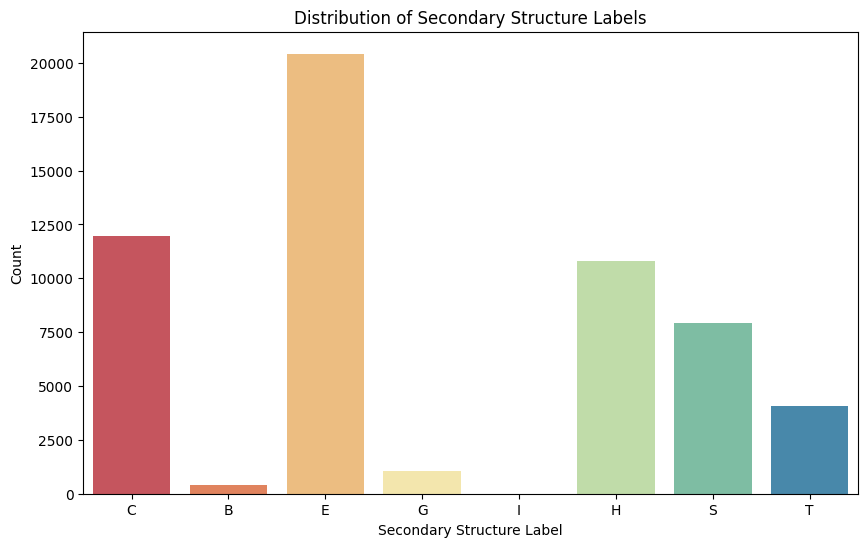

In [10]:
# Plot the distribution of secondary structure labels
def plot_distribution(df_counts):
    """
    Plot the distribution of secondary structure labels
    """
    for i, label in enumerate(secondary_structure_labels):
        n = df_counts[df_counts['label'] == label]['counts'].values[0]
        print(f'{label}: {n}')

    plt.figure(figsize=(10, 6))
    sns.barplot(x='label',
                y='counts',
                palette='Spectral',
                hue='label',
                data=df_counts)
    plt.title('Distribution of Secondary Structure Labels')
    plt.xlabel('Secondary Structure Label')
    plt.ylabel('Count')
    plt.show()

plot_distribution(df_counts)